In [190]:
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork as NW

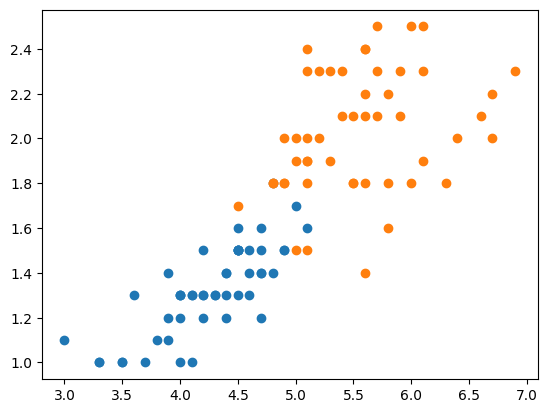

In [191]:
# Load data

iris_dtype = np.dtype([('vals', float, (4,)), 
                       ('art', np.str_, 16)])
vals, labels = np.loadtxt('../iris/iris.data', dtype=iris_dtype, delimiter=',', unpack=True)

vals = vals[50:]
labels = labels[50:]

iris = vals.T

iris.shape, labels

for lab in np.unique(labels):
    plt.plot(*iris[2:4, labels == lab], 'o')

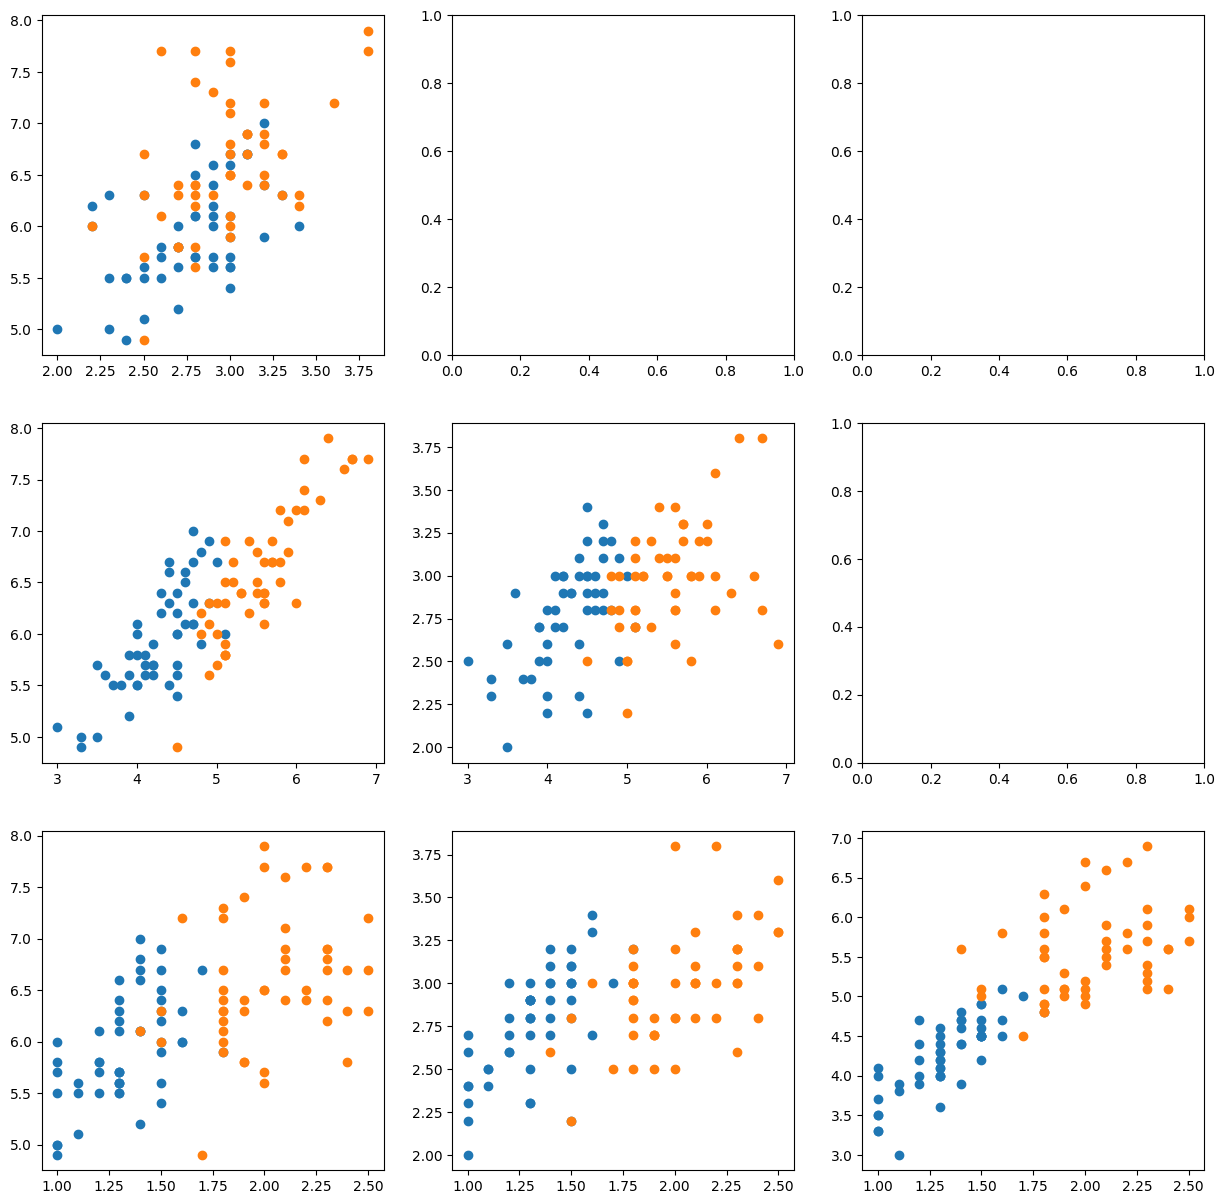

In [192]:
# Plot of different variables against eachother
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        if i <= j:
            continue

        plotMat = np.vstack([iris[i], iris[j]])
        for lab in np.unique(labels):
            ax[i-1, j].plot(*plotMat[:, labels == lab], 'o')

# Training network with Iris data

In [193]:
# Each sub-dictionary describes a layer of the neural network

layerIris = [
            {
                    "layerSize" : 4,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 0                 # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
            {
                    "layerSize" : 12,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 0                 # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
            {
                    "layerSize" : 2,               # parameter for deciding the amount of nodes in the layer
                    "layerType" : 0                 # Only a single layer type exists right now, so just use 0 (Convolutional layers will be added)
            }, 
        ]

IrisNetwork = NW.NeuralNetwork(layerIris)

In [194]:
iris.shape, labels.shape

((4, 100), (100,))

In [195]:
labels[0:149:50]

array(['Iris-versicolor', 'Iris-virginica'], dtype='<U16')

## Opdeling af data i et testsæt og et træningssæt

Træningssættet kommer til at indeholde 30 elementer, og testsættet kommer til at indeholde 20 elementer.

In [196]:
irisTrain = np.hstack([iris[:, 0:30], iris[:, 50:80], iris[:, 100:130]])
labelsTrain = np.hstack([labels[0:30], labels[50:80], labels[100:130]])

irisTest = np.hstack([iris[:, 30:50], iris[:, 80:100], iris[:, 130:150]])
labelsTest = np.hstack([labels[30:50], labels[80:100], labels[130:150]])

irisTrain.shape, labelsTrain.shape, irisTest.shape, labelsTest.shape, labelsTrain

((4, 60),
 (60,),
 (4, 40),
 (40,),
 array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
    

In [197]:
# Convert labels to expected outputs

expectedTrainingOutputs = np.array([])
for label in labelsTrain:
    expectedOutput = np.ndarray(0)
    if label == 'Iris-versicolor':
        expectedOutput = np.array([1., 0.]) [:, np.newaxis]
    else:
        expectedOutput = np.array([0., 1.]) [:, np.newaxis]

    if expectedTrainingOutputs.size == 0:
        expectedTrainingOutputs = expectedOutput
    else:
        expectedTrainingOutputs = np.hstack([expectedTrainingOutputs, expectedOutput])

expectedTrainingOutputs[:, 0:90:6]


array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]])

In [198]:
# Convert labels to expected outputs

expectedTestOutputs = np.array([])
for label in labelsTest:
    expectedOutput = np.ndarray(0)
    if label == 'Iris-versicolor':
        expectedOutput = np.array([1., 0.]) [:, np.newaxis]
    else:
        expectedOutput = np.array([0., 1.]) [:, np.newaxis]

    if expectedTestOutputs.size == 0:
        expectedTestOutputs = expectedOutput
    else:
        expectedTestOutputs = np.hstack([expectedTestOutputs, expectedOutput])

expectedTestOutputs[:, 0:60:6]


array([[1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1.]])

# Run training algorithm on network with given training data (Gradient Descend)

In [199]:
for i in range(300):
    IrisNetwork.trainNetworkGradDec(trainingInput=irisTrain, expectedOutputMatrix=expectedTrainingOutputs, iterationNum=i)
    print("Iteration: ", i)
    
    # Check correctness
    counter : int = 0
    for test in range(len(irisTest[0])):
        IrisNetwork.setInput(input=irisTest[:, test])
        IrisNetwork.runNetwork()
        #print(np.argmax(IrisNetwork.getOutput() [:, np.newaxis]), np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]))
        if np.argmax(IrisNetwork.getOutput() [:, np.newaxis]) == np.argmax(expectedTestOutputs[:, test] [:, np.newaxis]):
            counter += 1

    print(counter / len(irisTest[0]))

GradientLength:  7.547833163807208
Iteration:  0
0.5
GradientLength:  19.487412683449364
Iteration:  1
0.5
GradientLength:  5.963984907296708
Iteration:  2
0.5
GradientLength:  15.566779876708166
Iteration:  3
0.5


GradientLength:  10.5767787550337
Iteration:  4
0.5
GradientLength:  5.578193112697109
Iteration:  5
0.5
GradientLength:  9.689817938787195
Iteration:  6
0.5
GradientLength:  10.929631112760688
Iteration:  7
0.5
GradientLength:  11.53992889185217
Iteration:  8
0.5
GradientLength:  7.724435300728502
Iteration:  9
0.5
GradientLength:  10.77427613660454
Iteration:  10
0.725
GradientLength:  12.899902702427692
Iteration:  11
0.5
GradientLength:  12.504102572193231
Iteration:  12
0.5
GradientLength:  24.11817558898407
Iteration:  13
0.5
GradientLength:  17.537879060977424
Iteration:  14
0.65
GradientLength:  4.619550645615554
Iteration:  15
0.5
GradientLength:  5.742219320636379
Iteration:  16
0.5
GradientLength:  7.079142301321987
Iteration:  17
0.65
GradientLength:  6.063260153768542
Iteration:  18
0.5
GradientLength:  8.689606406017065
Iteration:  19
0.75
GradientLength:  10.963989118548032
Iteration:  20
0.5
GradientLength:  15.366254604748764
Iteration:  21
0.5
GradientLength:  9.98870

In [200]:
IrisNetwork.setInput(input=irisTest[:, 15])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 15] [:, np.newaxis]

(array([[0.76007569],
        [0.22239643]]),
 array([[1.],
        [0.]]))

In [201]:
IrisNetwork.setInput(input=irisTest[:, 25])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 25] [:, np.newaxis]

(array([[0.27183285],
        [0.76132485]]),
 array([[0.],
        [1.]]))

In [202]:
IrisNetwork.setInput(input=irisTest[:, 26])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 26] [:, np.newaxis]

(array([[0.1162863 ],
        [0.87125397]]),
 array([[0.],
        [1.]]))

In [203]:
IrisNetwork.setInput(input=irisTest[:, 23])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 23] [:, np.newaxis]

(array([[0.42726943],
        [0.58559338]]),
 array([[0.],
        [1.]]))

In [204]:
IrisNetwork.setInput(input=irisTest[:, 5])
IrisNetwork.runNetwork()
IrisNetwork.getOutput() [:, np.newaxis], expectedTestOutputs[:, 5] [:, np.newaxis]

(array([[0.6591338 ],
        [0.30167771]]),
 array([[1.],
        [0.]]))

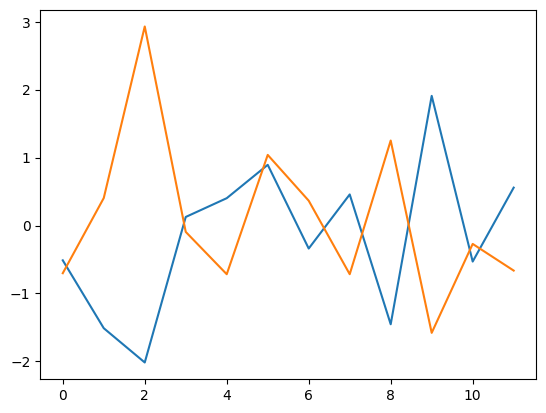

In [205]:
for node in IrisNetwork.layers[2].nodes:
    plt.plot(node.weights)

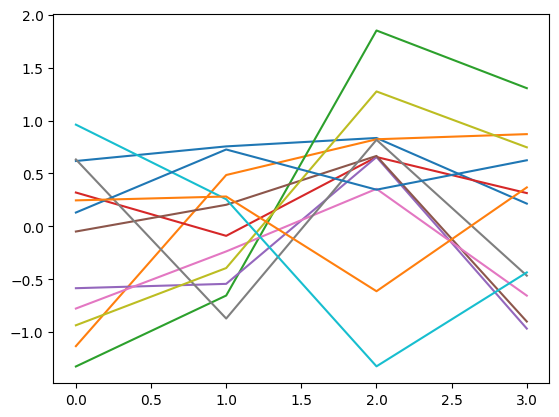

In [206]:
for node in IrisNetwork.layers[1].nodes:
    plt.plot(node.weights)

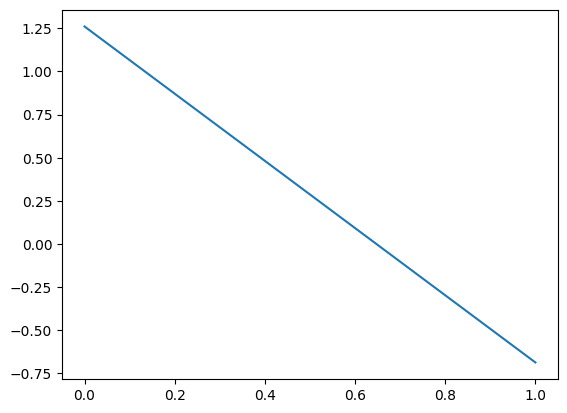

In [207]:
plt.plot([node.bias for node in IrisNetwork.layers[2].nodes])

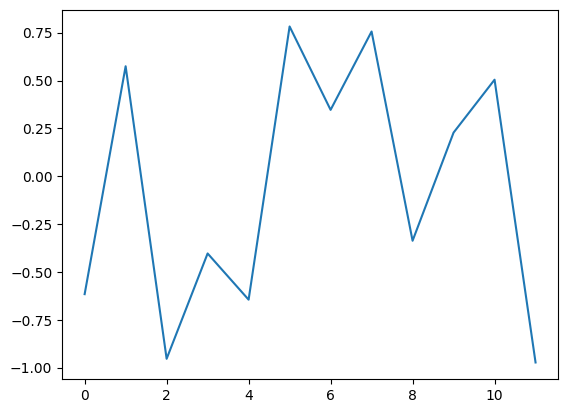

In [208]:
plt.plot([node.bias for node in IrisNetwork.layers[1].nodes])